# PEC1: Secuencias de splice sites en homo sapiens


### Raúl Pérez Prats
### 05/04/2024

## Tabla de Contenidos

### 1. [Algoritmo K-NN](#1)
#### 1.1 [Explicación](#1.1)
#### 1.2 [Ventajas y Desventajas](#1.2)
### 2. [Codificación One-Hot](#2)
### 3. [Script Clasficador k-NN](#3)
#### [(A)](#3.1)
#### [(B)](#3.2)
#### [(C)](#3.3)
#### [(D)](#3.4)
#### [(E)](#3.5)
### 4. [Representación Secuencias Logo](#4)

## Algoritmo k-NN <a class="anchor" id="1"></a>

### 1- Explicación <a class="anchor" id="1.1"></a>

El algoritmo k-NN es un método de classificación supervisado que utiliza la proximidad entre puntos de diversos grupos para clasificar nuevos puntos en sus grupos correspondientes.

Este algoritmo trabaja bajo la asumción de que los puntos pertenecientes a un mismo grupo deben de ser parecidos y por lo tanto seran más próximos entre ellos espacialmente que entre puntos de otros grupos.

Para clasificar un nuevo punto X, el k-Nearest-Neighbours, tal y como indica su nombre, seleccionará los k puntos más próximos a X y classificará X en función de una votación: el grupo que aparezca más veces en los k puntos más próximos determinará el grupo al que pertenecerá X.


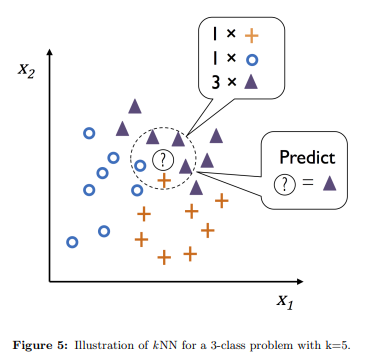

Extraído de: https://sebastianraschka.com/pdf/lecture-notes/stat479fs18/02_knn_notes.pdf, pg 9

Para determinar cúales son los puntos más cercanos a X se pueden usar diferentes distancias:

Distancia euclidiana: Mide la distáncia en linea recta entre dos puntos 

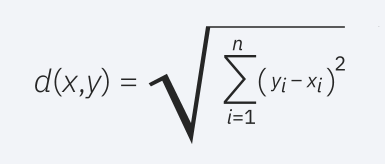

Distancia manhattan: mide el valor absoluto entre dos puntos 

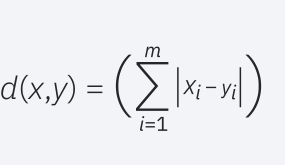



### Ventajas y Desventajas del k-NN <a class="anchor" id="1.2"></a>

| Ventajas  | Desventajas |
| :-------------: |:-------------:|
| Facil implementación      | Escalabilidad limitada: como trabaja siempre en memoria, existe un límite de datos que puede procesar |
| No necesita un periodo de entrenamiento | Problemas con gran número de dimensiones |
| Pocos hiperparámetros (solo necesita la k y la métrica de distancia)    | Overfitting: Los valores pequeños de K pueden causar predicciones poco precisas o incorrectas |


### 2- Codificación One Hot <a class="anchor" id="2"></a>

In [146]:
import pandas as pd

In [147]:
df = pd.read_csv('splice.csv', sep = ',')

In [148]:
def one_hot_encode_df(df):
    #Encoding de las secuencias
    one_hot_encoded_data = pd.get_dummies(df, 
                                          columns = ['Pos.1', 'Pos.2','Pos.3',
                                                     'Pos.4','Pos.5', 'Pos.6',
                                                     'Pos.7'])
    #Transformamos true/false en 1/0
    one_hot_encoded_data_0_1 = one_hot_encoded_data.applymap(lambda x: 1 if x else 0) 
    return one_hot_encoded_data_0_1

### 3- Script Clasficador k-NN <a class="anchor" id="3"></a>

#### (A)<a class="anchor" id="3.1"></a>

In [149]:
import pandas as pd

df = pd.read_csv('splice.csv', sep = ',')

In [150]:
clases = set(list(df['y']))
num_clases = len(clases)
print('Comprobamos que hay', num_clases, 'clases')

def observaciones_clases(clases):
    #creamos diccionario
    dic_obs_clases = {}
    for clase in clases:
        #contamos los elementos de cada clase
        clase_obs = [1 for x in df['y'] if x == clase]
        dic_obs_clases[clase] = len(clase_obs)
        print('En la clase',clase,'hay:', dic_obs_clases[clase],'observaciones')
    return dic_obs_clases

obs_por_clase = observaciones_clases(clases)

Comprobamos que hay 2 clases
En la clase 0 hay: 200 observaciones
En la clase 1 hay: 200 observaciones


El dataset está balanceado

#### (B)<a class="anchor" id="3.2"></a>

In [151]:
#Aplicamos la funcion de one hot encoding y mostramos el df
df_encoded = one_hot_encode_df(df)
df_encoded.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11648\1513196886.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot_encoded_data_0_1 = one_hot_encoded_data.applymap(lambda x: 1 if x else 0)


,y,Pos.1_a,Pos.1_c,Pos.1_g,Pos.1_t,Pos.2_a,Pos.2_c,Pos.2_g,Pos.2_t,Pos.3_a,...,Pos.5_g,Pos.5_t,Pos.6_a,Pos.6_c,Pos.6_g,Pos.6_t,Pos.7_a,Pos.7_c,Pos.7_g,Pos.7_t
0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


#### (C)<a class="anchor" id="3.3"></a>

In [152]:
import numpy as np
from sklearn.model_selection import train_test_split
#partimos el dataset en train y test
y = df_encoded.pop('y')
x = df_encoded
x_train, x_test, y_train, y_test = train_test_split(
                    x, y, train_size = 0.67, test_size=0.33, random_state=123
                    )
x_train.head()

,Pos.1_a,Pos.1_c,Pos.1_g,Pos.1_t,Pos.2_a,Pos.2_c,Pos.2_g,Pos.2_t,Pos.3_a,Pos.3_c,...,Pos.5_g,Pos.5_t,Pos.6_a,Pos.6_c,Pos.6_g,Pos.6_t,Pos.7_a,Pos.7_c,Pos.7_g,Pos.7_t
71,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
94,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
273,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
386,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
35,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [153]:
y_train.head()

71     1
94     1
273    0
386    0
35     1
Name: y, dtype: int64

#### (D)<a class="anchor" id="3.4"></a>

In [145]:
from sklearn.neighbors import KNeighborsClassifier
#Declaramos modelo
knn = KNeighborsClassifier(n_neighbors=11)
#Introducimos los datos
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [116]:
from sklearn.metrics import accuracy_score
acc_rate1=[]
# iteramos sobre todos los valores de K y calculamos el valor de la accuracy
neighbours = [ 1, 5, 11, 21, 51, 71]
for i in neighbours:
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc1=accuracy_score(y_test,y_pred,normalize=True)*float(100)
    acc_rate1.append(acc1)

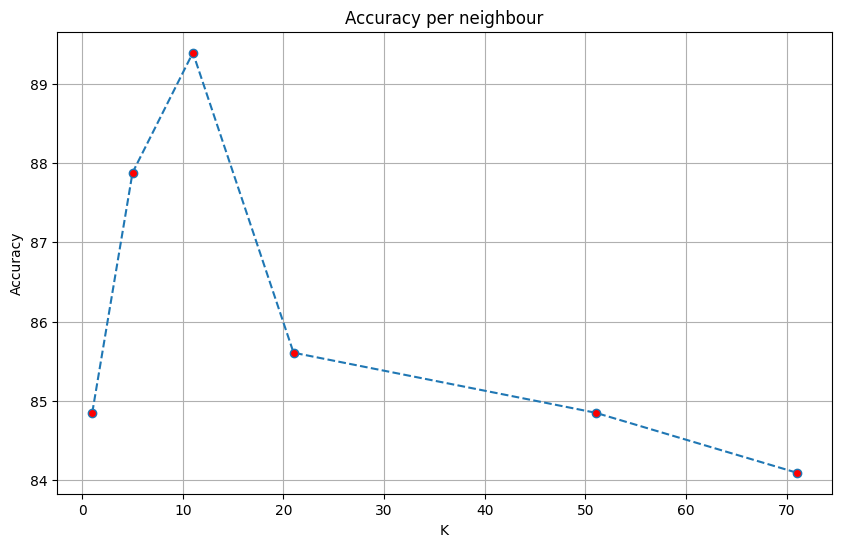

In [117]:
#Graficamos accuracy para cada K
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(neighbours,acc_rate1,marker='o',markerfacecolor='red',linestyle='dashed')
plt.title('Accuracy per neighbour')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.grid()
plt.show()

In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

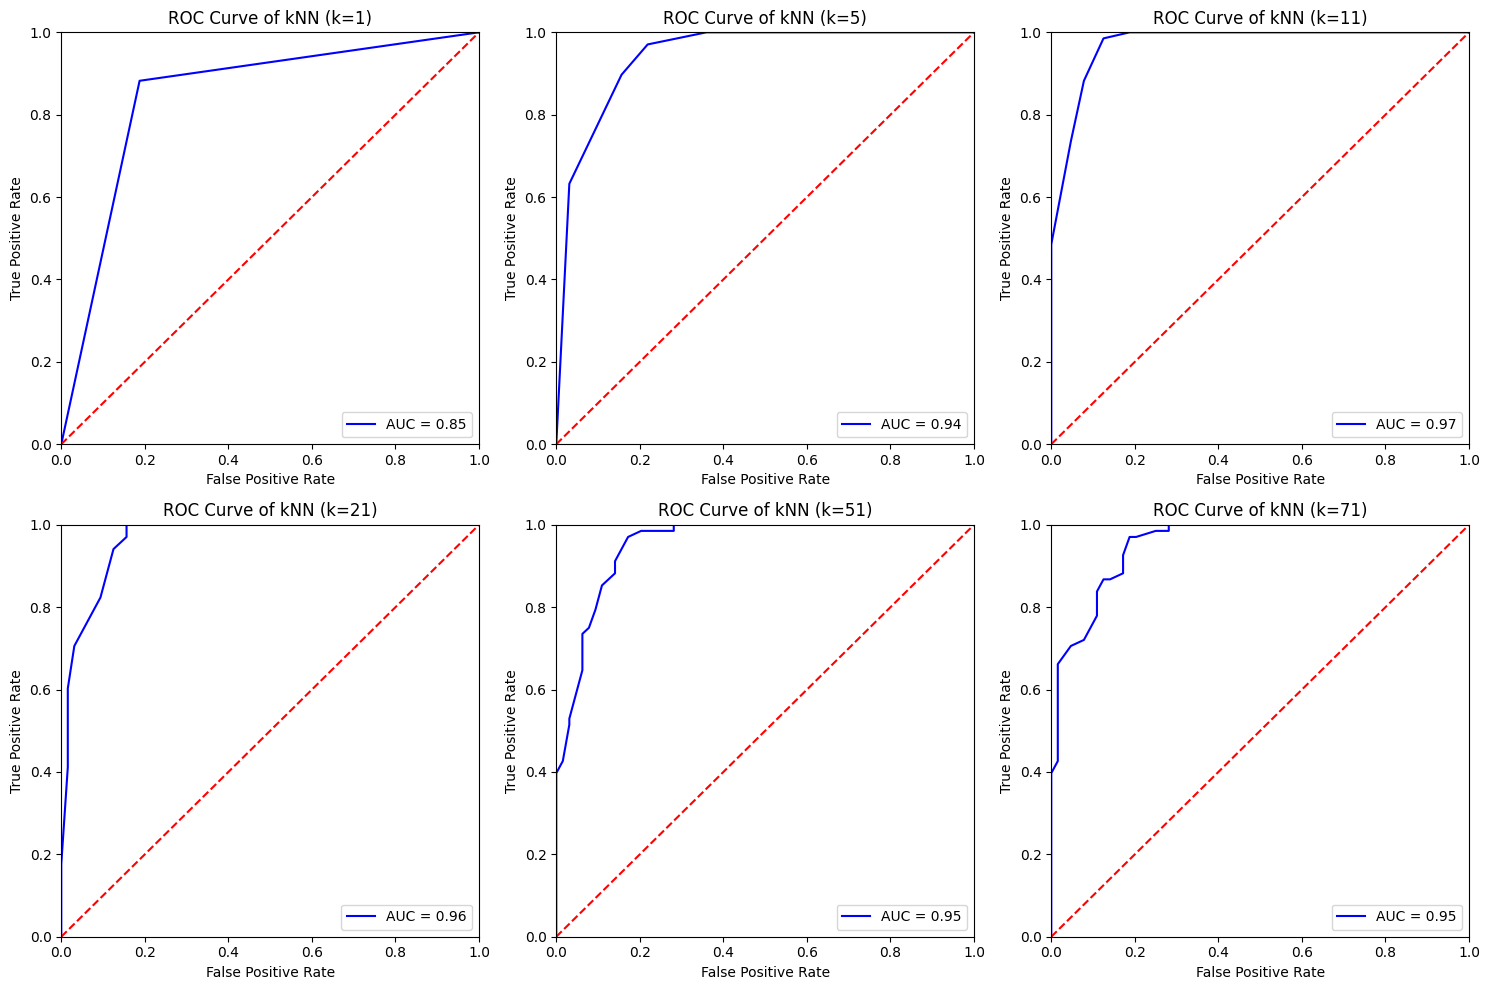

In [119]:
from sklearn.metrics import roc_curve, auc
# Generamos una roc curve para cada valor K
def roc_curve_auc(k, ax):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    y_scores = knn.predict_proba(x_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    ax.legend(loc='lower right')
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    ax.set_title('ROC Curve of kNN (k=%d)' % k)

# Grid of plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
#Iteramos sobre todos los valores K para generar los 6 graficos
neighbours = [1, 5, 11, 21, 51, 71]
for k, ax in zip(neighbours, axes.flatten()):
    roc_curve_auc(k, ax)

plt.tight_layout()
plt.show()

In [120]:
from sklearn.metrics import confusion_matrix

def metrics_knn(k):
    # Extraemos metricas para cada valor de K
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    
    y_scores = knn.predict_proba(x_test)
    y_pred = knn.predict(x_test)  # Predict labels
    cm = confusion_matrix(y_test, y_pred)

    # Extraemos metricas de la confusion matrix
    TN, FP, FN, TP = cm.ravel()
    
    return TN, FP, FN, TP

dic_metrics = {}
neighbours = [1, 5, 11, 21, 51, 71]

tn_list = []
fp_list = []
fn_list = []
tp_list = []

for k in neighbours:
    TN, FP, FN, TP = metrics_knn(k)
    tn_list.append(TN)
    fp_list.append(FP)
    fn_list.append(FN)
    tp_list.append(TP)
    
dic_metrics['K'] = neighbours
dic_metrics['TP'] = tp_list
dic_metrics['TN'] = tn_list
dic_metrics['FP'] = fp_list
dic_metrics['FN'] = fn_list

# Creamos un dataframe con las metricas de cada valor de K
df_metrics = pd.DataFrame.from_dict(dic_metrics)
df_metrics

,K,TP,TN,FP,FN
0,1,60,52,12,8
1,5,66,50,14,2
2,11,68,50,14,0
3,21,68,45,19,0
4,51,68,44,20,0
5,71,68,43,21,0


#### (E)<a class="anchor" id="3.5"></a>

Tal y como se muestra en la figura de Accuracy per neighbour, el valor de K más óptimo parece ser el de K = 11.
Cuando comparamos todas las curvas ROC con los valores AUC vemos que K = 11 tiene el valor AUC más alto (AUC = 0.97), seguido de k = 25 (AUC = 0.96).
También podemos observar en la tabla de métricas que k = 11 es el valor que mejor maximiza los True Positive (TP) y True Negative (TN) minimizando los False Positive (FP) y los False Negative(FN), ya que si utilizamos un valor de k > 11 los FP aumentan y si utilizamos un valor k < 11 los FN aumentan.
Por lo tanto K = 11 es el valor de 'Neighbours' más apropiado para clasificar estos datos con el algoritmo K-NN.

### 4- Representación Secuencias Logo <a class="anchor" id="4"></a>

In [121]:
df
#separamos dataframe según el valor de y. Eliminamos columna y.
#Reestablecemos indices
df_0 = df.loc[(df["y"] ==0)].drop(["y"], axis = 1).reset_index(drop=True) 
df_1 = df.loc[(df["y"] ==1)].drop(["y"], axis = 1).reset_index(drop=True)

In [123]:
seq = ['t', 't', 't', 't', 't', 't', 'c']
def nucl_proportion(seq):
    a = 0
    g = 0
    t = 0 
    c = 0
    seq_length = len(seq)
    for nucl in seq:
        if nucl == 'a':
            a+=1
        elif nucl == 'g':
            g+=1
        elif nucl == 't':
            t+=1
        elif nucl == 'c':
            c+=1
    # Calculamos la proporción de cada nucleótido en la secuencia
    prop_a = a/seq_length
    prop_g = g/seq_length
    prop_t = t/seq_length
    prop_c = c/seq_length
    
    return prop_a,prop_g,prop_t,prop_c
    
prop_a,prop_g,prop_t,prop_c = nucl_proportion(seq) 
print(prop_a,prop_g,prop_t,prop_c)

def dataframe_proportions(df):
    # Creamos un diccionario con todas las proporciones 
    #nucleotidicas de todas las secuencias y luego creamos un dataframe
    dic_proportions = {'A':[],'C':[],'G':[],'T':[]}
    
    for fila in df.iterrows():
        sequence = list(fila[1])
        prop_a,prop_g,prop_t,prop_c = nucl_proportion(sequence)
        dic_proportions['A'].append(prop_a)
        dic_proportions['G'].append(prop_g)
        dic_proportions['T'].append(prop_t)
        dic_proportions['C'].append(prop_c)
    df_prop = pd.DataFrame.from_dict(dic_proportions)

    return df_prop

0.0 0.0 0.8571428571428571 0.14285714285714285


In [130]:
# Dataframes de proporcion nucleotidica de
#splice site (1) y no splice site (0)
df_prop_0 = dataframe_proportions(df_0)
df_prop_1 = dataframe_proportions(df_1)
df_prop_0, df_prop_1

(            A         C         G         T
 0    0.000000  0.142857  0.000000  0.857143
 1    0.142857  0.142857  0.428571  0.285714
 2    0.428571  0.142857  0.428571  0.000000
 3    0.000000  0.000000  0.285714  0.714286
 4    0.142857  0.000000  0.000000  0.857143
 ..        ...       ...       ...       ...
 195  0.000000  0.142857  0.571429  0.285714
 196  0.571429  0.285714  0.000000  0.142857
 197  0.285714  0.000000  0.142857  0.571429
 198  0.285714  0.142857  0.285714  0.285714
 199  0.428571  0.142857  0.285714  0.142857
 
 [200 rows x 4 columns],
             A         C         G         T
 0    0.428571  0.000000  0.571429  0.000000
 1    0.428571  0.000000  0.571429  0.000000
 2    0.571429  0.000000  0.285714  0.142857
 3    0.142857  0.285714  0.571429  0.000000
 4    0.142857  0.142857  0.714286  0.000000
 ..        ...       ...       ...       ...
 195  0.285714  0.000000  0.571429  0.142857
 196  0.142857  0.142857  0.571429  0.142857
 197  0.428571  0.142857  0.

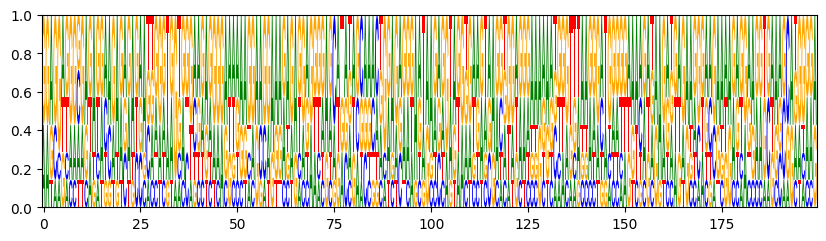

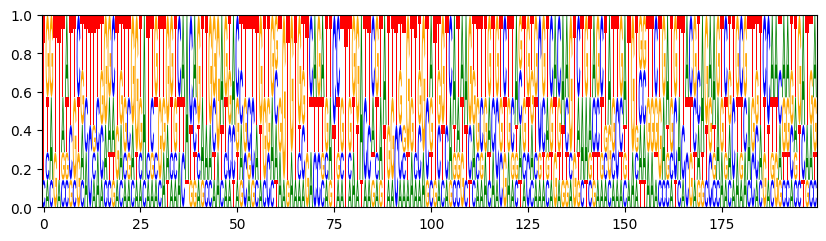

In [129]:
#seqlogo daba muchos problemas con Ghostscript:
#OSError: Could not find Ghostscript on path.
#There should be either a gs executable or a gswin32c.exe on your system's path

#Así que he decidido usar logomaker.

import logomaker as lm
logo_splice_sites = lm.Logo(df_prop_1, font_name = 'Arial')
logo_NO_splice_sites = lm.Logo(df_prop_0, font_name = 'Arial')

Tal y como se puede ver en la secuencia logo de las secuencias Splite Site (primera secuencia logo) en estas secuencias tienen una alta proporción en Citosina y Guanina, mientras que en la secuencia logo de las secuencias que NO son Splite Site (segunda secuencia logo) se observa una mayor proporción de Timina. La Citiosina y la Guanina son nucleotidos que habitualmente son presentes con mayor frecuencia en regiones altamente conservadas. 

Las regiones que forman splicing sites son regiones altamente conservadas, ya que son clave en el proceso de splicing y maduración del ARN para la correcta expresión génica, por lo tanto, tiene sentido que la secuencia logo de los Splite Site presente una mayor proporción de estos nucleótidos.

Esto indica que la comparación de las proporciones de Citosina y Guanina (mayores en splice sites) y timina (menor en splice sites) es un buen indicador para determinar si las secuencias son splice sites o no. 

Para determinar y establecer thresholds de proporción de Timina y Guanina para la óptima clasificación de las secuencias haría falta un estudio más profundo aplicando las técnicas estadísitcas y de machine learning correspondientes. Existen diversos algoritmos que podrían usarse para la clasificación de las secuencias en función de su proporción nucleotídica, un par de ejemplos son: la regresión logísitca y el multilayer perceptron.